In [2]:
import numpy as np
from scipy.signal import butter, freqz, lfilter
import matplotlib.pyplot as plt

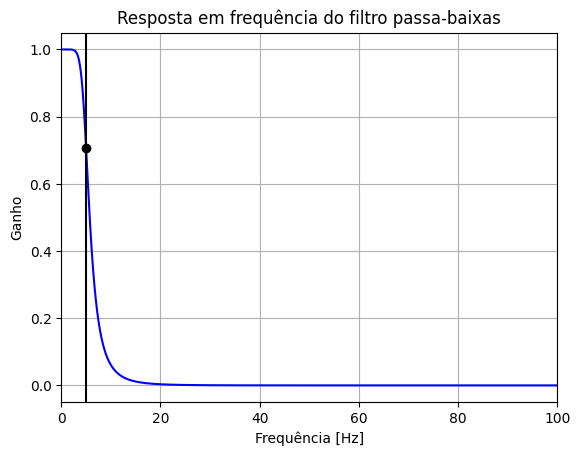

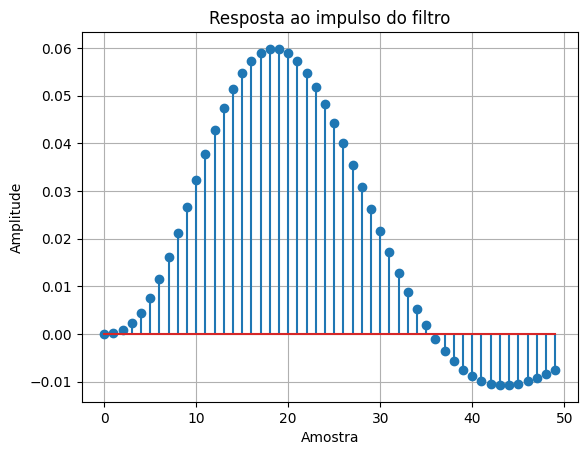

In [4]:
fs = 200  
fc = 5 

b, a = butter(N=4, Wn=fc/(fs/2), btype='low')

w, h = freqz(b, a, worN=8000)

# resposta em frequência
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(fc, 0.5*np.sqrt(2), 'ko')
plt.axvline(fc, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Resposta em frequência do filtro passa-baixas")
plt.xlabel('Frequência [Hz]')
plt.ylabel('Ganho')
plt.grid()
plt.show()

# Resposta ao impulso
impulse = np.zeros(50)
impulse[0] = 1
h = lfilter(b, a, impulse)

# Plot da resposta ao impulso
plt.stem(h)
plt.title("Resposta ao impulso do filtro")
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [5]:
def process_window(signal_window, b, a):
    signal_dft = np.fft.fft(signal_window)
    h_dft = np.fft.fft(h, n=len(signal_window))
    filtered_dft = signal_dft * h_dft
    filtered_signal_window = np.fft.ifft(filtered_dft)
    
    return np.real(filtered_signal_window)


def process_signal(signal, b, a, window_size):
    num_windows = len(signal) // window_size
    processed_signal = np.zeros(len(signal))
    
    for i in range(num_windows):
        start = i * window_size
        end = start + window_size
        processed_signal[start:end] = process_window(signal[start:end], b, a)
    
    return processed_signal

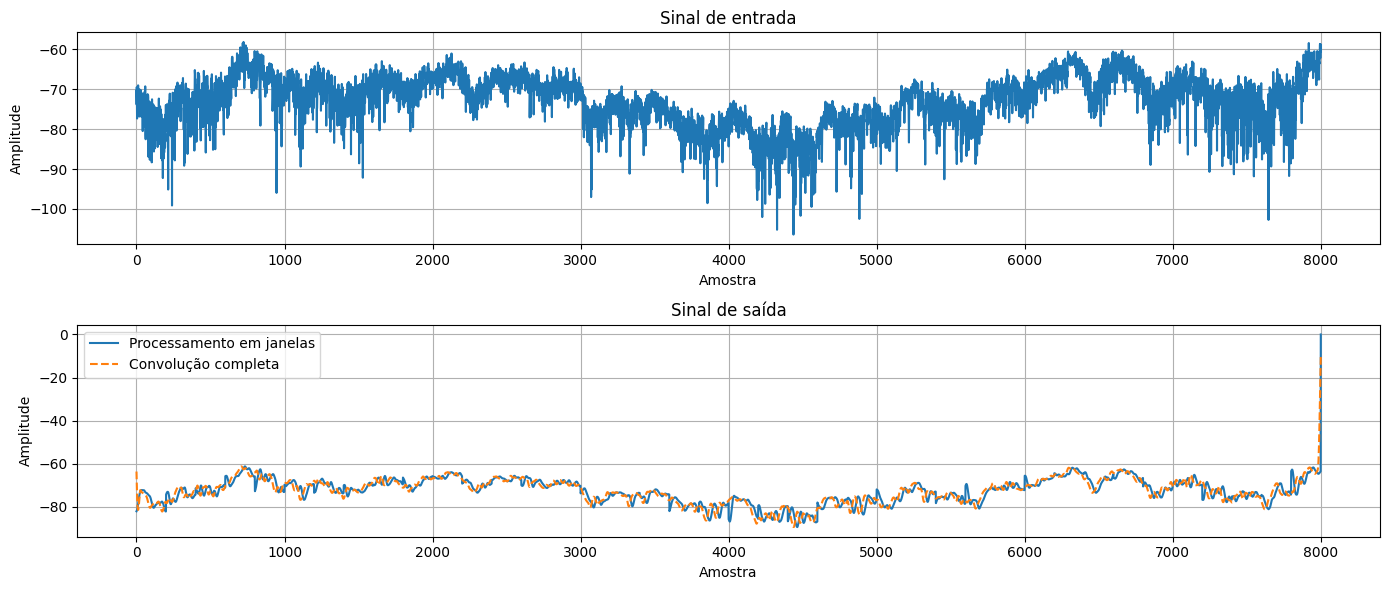

In [6]:
signal = np.loadtxt('potencia.txt')

window_size = fs  

processed_signal = process_signal(signal, b, a, window_size)
convolved_signal = np.convolve(signal, h, mode='same')


plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Sinal de entrada')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(processed_signal, label='Processamento em janelas')
plt.plot(convolved_signal, linestyle='dashed', label='Convolução completa')
plt.title('Sinal de saída')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()